In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-01-15 14:25:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  30.2MB/s    in 2.2s    

2021-01-15 14:25:08 (30.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile 

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

**The above cell helps to create the directories that are required to handle the datast images of the cats and the dogs!!** 

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.232.jpg', 'cat.323.jpg', 'cat.711.jpg', 'cat.350.jpg', 'cat.169.jpg']
['dog.981.jpg', 'dog.50.jpg', 'dog.432.jpg', 'dog.59.jpg', 'dog.368.jpg']


In [5]:
print("Total training cat images: ", len(os.listdir(train_cats_dir)))
print("Total training dog images: ", len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images:  1000
Total training dog images:  1000
total validation cat images : 500
total validation dog images : 500


Taking a look at a few images from the dataset !!

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Output the graph as 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating ove images

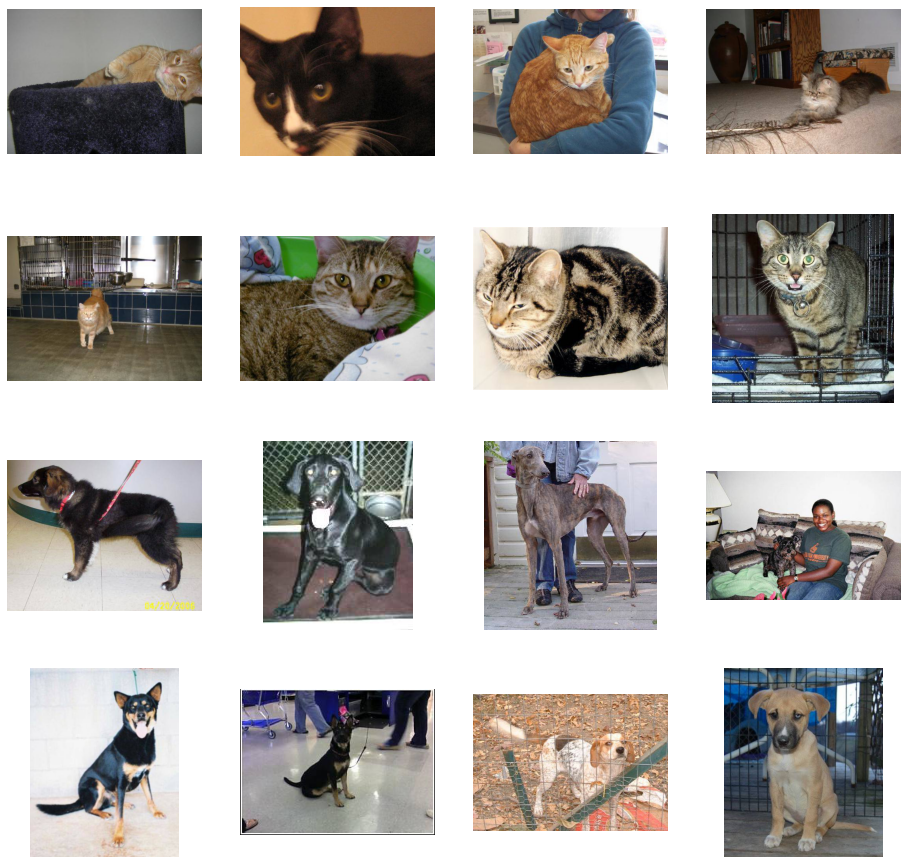

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, ncols*4)
pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# The Model

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [9]:

model = keras.models.Sequential([
            keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (150,150,3)),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Conv2D(32,(3,3),activation=keras.activations.relu),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Conv2D(64,(3,3),activation='relu'),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Flatten(),
            keras.layers.Dense(512,activation='relu'),
            keras.layers.Dense(1,activation='sigmoid')         
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [11]:
model.compile(optimizer='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [12]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=15, steps_per_epoch=100, validation_steps=50, verbose=1)

Epoch 1/15
100/100 [==============================] - 15s 82ms/step - loss: 0.7427 - accuracy: 0.5393 - val_loss: 0.6670 - val_accuracy: 0.6460
Epoch 2/15
100/100 [==============================] - 8s 78ms/step - loss: 0.6434 - accuracy: 0.6433 - val_loss: 0.6551 - val_accuracy: 0.6020
Epoch 3/15
100/100 [==============================] - 8s 78ms/step - loss: 0.5571 - accuracy: 0.7253 - val_loss: 0.5868 - val_accuracy: 0.6970
Epoch 4/15
100/100 [==============================] - 8s 78ms/step - loss: 0.4689 - accuracy: 0.7776 - val_loss: 0.6068 - val_accuracy: 0.6780
Epoch 5/15
100/100 [==============================] - 8s 77ms/step - loss: 0.3992 - accuracy: 0.8030 - val_loss: 0.6428 - val_accuracy: 0.7230
Epoch 6/15
100/100 [==============================] - 8s 78ms/step - loss: 0.2649 - accuracy: 0.8769 - val_loss: 0.7076 - val_accuracy: 0.7310
Epoch 7/15
100/100 [==============================] - 8s 77ms/step - loss: 0.1654 - accuracy: 0.9467 - val_loss: 0.8369 - val_accuracy: 0.721

# Testing the model

In [15]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving cat.jpeg to cat.jpeg
[0.]
cat.jpeg is a cat


# Visualizing the model's Working





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


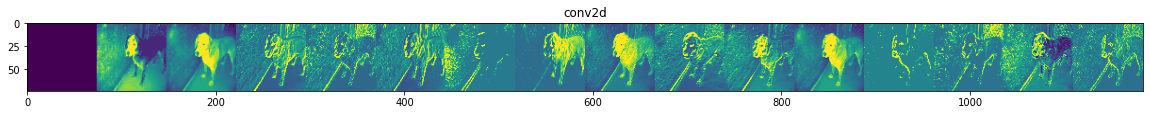

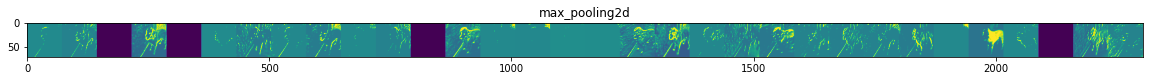

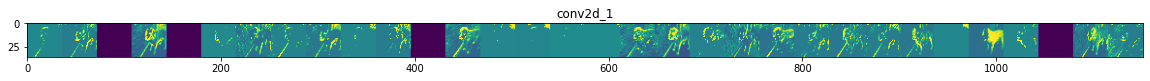

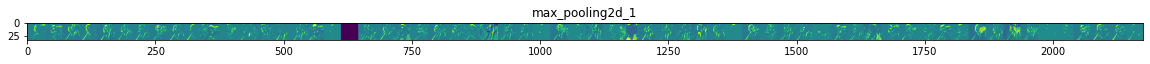

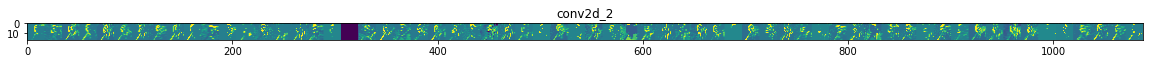

In [16]:
import random 
from keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = keras.models.Model(inputs= model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Evaluating Accuracy and Loss for the Model

Text(0.5, 1.0, 'Training and validation loss')

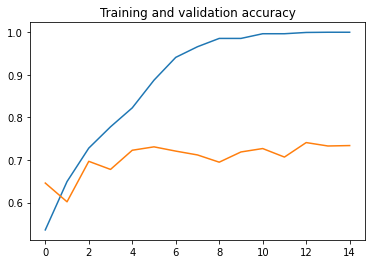

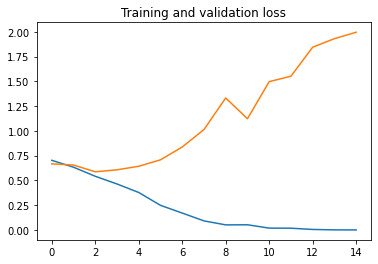

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting the training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()

#Plotting the traning and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')